In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import expit as sigmoid
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from skbio.stats.composition import closure
from matplotlib import ticker

import seaborn as sns
%matplotlib inline

# Contents

`../results/benchmark_output/abs` : Correlation results on the absolute abundances with the cystic fibrosis simulations

`../results/benchmark_output/rel` : Correlation results on the relative abundances with the cystic fibrosis simulations

`../results/benchmark_output/abs2` : Correlation results on the absolute abundances with the growth simulations

`../results/benchmark_output/rel2` : Correlation results on the relative abundances with the growth simulations

In [2]:
!ls ../results/benchmark_output/scale_benchmark/abs

ls: ../results/benchmark_output/scale_benchmark/abs: No such file or directory


In [3]:
!ls ../results/benchmark_output/scale_benchmark/rel

ls: ../results/benchmark_output/scale_benchmark/rel: No such file or directory


In [4]:
import glob

abs_dir = '../results/benchmark_output/scale_benchmark/abs'
rel_dir = '../results/benchmark_output/scale_benchmark/rel'

abs_csv_files = glob.glob('%s/*.csv' % abs_dir)
rel_csv_files = glob.glob('%s/*.csv' % rel_dir)

abs_txt_files = glob.glob('%s/*.txt' % abs_dir)
rel_txt_files = glob.glob('%s/*.txt' % rel_dir)

abs_tsv_files = glob.glob('%s/*.tsv' % abs_dir)
rel_tsv_files = glob.glob('%s/*.tsv' % rel_dir)

In [5]:
def plot_ranks(abs_ranks, rel_ranks, oc, axs, title=""):
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks.values[i, 2:], rel_ranks.values[i, 2:], 
                    facecolors='k')
        axs.scatter(abs_ranks.values[0, 2:], rel_ranks.values[0, 2:], 
                    facecolors='k')

    # negative metabolite
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks.values[i, 1], rel_ranks.values[i, 1], marker='v',
                    facecolors='r')
    axs.scatter(abs_ranks.values[1, 1], rel_ranks.values[1, 1], marker='v', 
                facecolors='r', label='- metabolite, - microbe')    
    axs.scatter(abs_ranks.values[0, 1], rel_ranks.values[0, 1], marker='v', 
                facecolors='r', label='- metabolite, + microbe')
    
    # positive metabolite
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks.values[i, 0], rel_ranks.values[i, 0], marker='^', 
                    facecolors='b')
    axs.scatter(abs_ranks.values[1, 0], rel_ranks.values[1, 0], marker='^', 
                facecolors='b', label='+ metabolite, - microbe')    
    axs.scatter(abs_ranks.values[0, 0], rel_ranks.values[0, 0], marker='^', 
                facecolors='b', label='+ metabolite, + microbe') 
    axs.set_xlabel('Absolute')
    axs.set_ylabel('Relative')
    axs.set_title(title)

In [6]:
n = 30
t = np.linspace(0, 25, n)
omax = 2e2
mmax = 7e2
k1 = 20   #number of microbes
k2 = 100  # number of metabolites

ao = np.hstack((np.array([0.4]), np.random.normal(0.1, 0.01, size=(k1-1))))
am = np.hstack((np.array([0.2, -0.2]), np.random.normal(0, 0.01, size=(k2-2))))

e1 = np.random.normal(scale=0.3, size=(k1, n))
o = np.exp(np.outer(ao, t) + e1) 

e2 = np.random.normal(scale=0.3, size=(k2, n))
m = np.exp(np.outer(am, t) + e2) 

oids = ['microbe_%i' % i for i in range(o.shape[0])]
mids = ['metabolite_%i' % i for i in range(m.shape[0])]

o = pd.DataFrame(o, index=oids)
m = pd.DataFrame(m, index=mids)

In [7]:
o_abs = o.T
m_abs = m.T

o_proportions = o_abs.apply(lambda x: x / x.sum(), axis=1)
m_proportions = m_abs.apply(lambda x: x / x.sum(), axis=1)

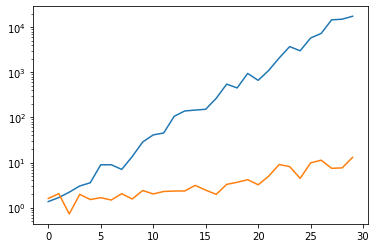

In [8]:
plt.plot(o_abs['microbe_0'])
plt.plot(o_abs['microbe_1'])
plt.yscale('log')

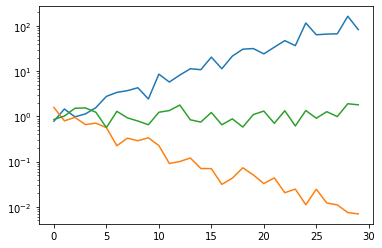

In [9]:
plt.plot(m_abs['metabolite_0'])
plt.plot(m_abs['metabolite_1'])
plt.plot(m_abs['metabolite_99'])
plt.yscale('log')

In [10]:
abs_r = pd.DataFrame(index=oids, columns=mids)
abs_p = pd.DataFrame(index=oids, columns=mids)
rel_r = pd.DataFrame(index=oids, columns=mids)
rel_p = pd.DataFrame(index=oids, columns=mids)

for i in oids:
    for j in mids:
        res = spearmanr(o_proportions[i], m_proportions[j])
        rel_r.loc[i, j] = res[0]
        rel_p.loc[i, j] = res[1]


for i in oids:
    for j in mids:
        res = spearmanr(o_abs[i], m_abs[j])
        abs_r.loc[i, j] = res[0]
        abs_p.loc[i, j] = res[1]        
            

def propr(x, y):
    idx = np.logical_and(x > 0, y > 0)
    return np.var(np.log(x[idx] / y[idx]))

abs_phi = pd.DataFrame(index=oids, columns=mids)
rel_phi = pd.DataFrame(index=oids, columns=mids)
for i in oids:
    for j in mids:
        res = propr(o_abs[i], m_abs[j])
        abs_phi.loc[i, j] = res
        
for i in oids:
    for j in mids:
        res = propr(o_proportions[i], m_proportions[j])
        rel_phi.loc[i, j] = res

(-0.5280120057633519, 5.34619627418926e-144)


Text(0, 0.5, 'Pearson (relative)')

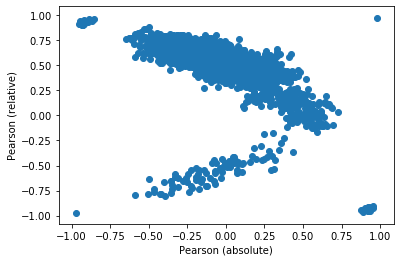

In [11]:
plt.scatter(abs_r.values.ravel(), rel_r.values.ravel())
print(pearsonr(abs_r.values.ravel(), rel_r.values.ravel()))
plt.xlabel('Pearson (absolute)')
plt.ylabel('Pearson (relative)')

(-0.14338924431001804, 1.1801261504161846e-10)


Text(0, 0.5, 'Proportionality (relative)')

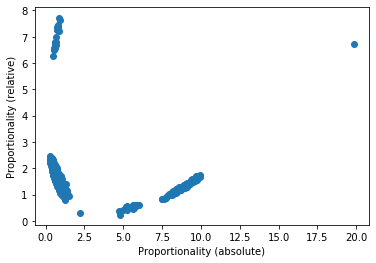

In [12]:
plt.scatter(abs_phi.values.ravel(), rel_phi.values.ravel())
print(pearsonr(abs_phi.values.ravel(), rel_phi.values.ravel()))
plt.xlabel('Proportionality (absolute)')
plt.ylabel('Proportionality (relative)')

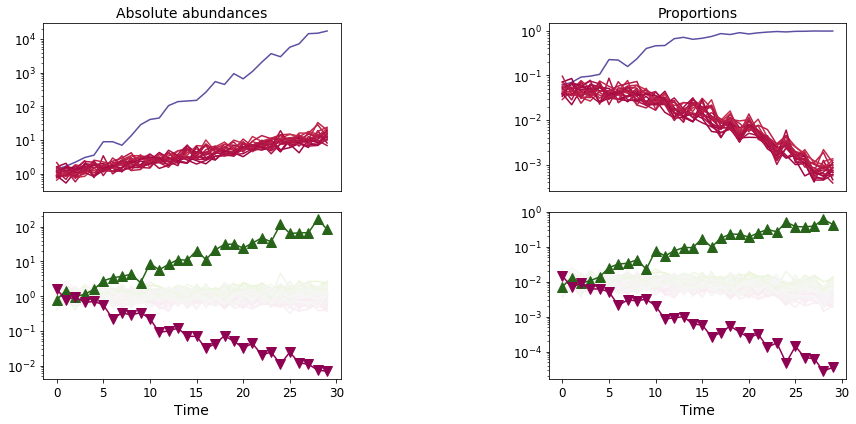

In [13]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

microbe_cmap = plt.cm.Spectral
metabolite_cmap = plt.cm.PiYG
oc = microbe_cmap((ao - ao.min()) / (ao.max() - ao.min()))
mc = metabolite_cmap((am - am.min()) / (am.max() - am.min()))

ticksize = 12
labelsize = 14

def plot_microbes(X, c, ax):
    for i, ci in enumerate(X.columns):
        ax.plot(X[ci], c=c[i])

        
def plot_metabolites(X, c, ax):

    for i in range(2, X.shape[1]):
        ax.plot(X.iloc[:, i], c=c[i])
    ax.plot(X['metabolite_0'], c=c[0], marker='^', markersize=10)
    ax.plot(X['metabolite_1'], c=c[1], marker='v', markersize=10)        
        
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2)
ax00 = plt.subplot(gs[0, 0])
ax10 = plt.subplot(gs[1, 0])
ax01 = plt.subplot(gs[0, 1])
ax11 = plt.subplot(gs[1, 1])

plot_microbes(o_abs, oc, ax00)
ax00.set_yscale('log')
ax00.tick_params(labelsize=ticksize)
ax00.set_xticks([])
ax00.set_title('Absolute abundances', fontsize=labelsize)
#ax00.set_ylabel('Microbes', fontsize=labelsize)

plot_metabolites(m_abs, mc, ax10)
ax10.set_yscale('log')
ax10.tick_params(labelsize=ticksize)
ax10.set_xlabel('Time', fontsize=labelsize)
#ax10.set_ylabel('Metabolites', fontsize=labelsize)

plot_microbes(o_proportions, oc, ax01)
ax01.set_yscale('log')
ax01.tick_params(labelsize=ticksize)
ax01.set_xticks([])
ax01.set_title('Proportions', fontsize=labelsize)

plot_metabolites(m_proportions, mc, ax11)
ax11.set_yscale('log')
ax11.tick_params(labelsize=ticksize)
ax11.set_xlabel('Time', fontsize=labelsize)

#axs.legend(fontsize=12)
plt.tight_layout() 
plt.subplots_adjust(wspace=0.7)

In [14]:
import tensorflow as tf
from rhapsody.multimodal import MMvec
from tensorflow import set_random_seed
from scipy.sparse import coo_matrix

with tf.Graph().as_default(), tf.Session() as session:
    set_random_seed(0)
    model = MMvec(beta_1=0.8, beta_2=0.9, latent_dim=1, learning_rate=1e-1)
    stats = model(session,
                  coo_matrix(o_abs.values), m_abs.values,
                  coo_matrix(o_abs.values), m_abs.values)
    abs_stats = model.fit(epoch=5000, summary_interval=1)
    vdim = model.V.shape[0]
    V = np.hstack((np.zeros((vdim, 1)), model.V))
    Vbias = np.hstack((np.zeros(1), model.Vbias.ravel()))
    modelU = np.hstack(
        (np.ones((model.U.shape[0], 1)), model.Ubias, model.U))
    modelV = np.vstack(
        (Vbias, np.ones((1, V.shape[1])), V))
    abs_ranks = modelU @ modelV

/Users/jmorton/miniconda3/envs/mmvec/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


Instructions for updating:
Use tf.random.categorical instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Use tf.cast instead.


100%|██████████| 60000/60000 [00:32<00:00, 1859.70it/s]


In [15]:
with tf.Graph().as_default(), tf.Session() as session:
    set_random_seed(0)
    model = MMvec(beta_1=0.8, beta_2=0.9, latent_dim=1, learning_rate=1e-1)
    model(session,
                  coo_matrix(o_proportions.values), m_proportions.values,
                  coo_matrix(o_proportions.values), m_proportions.values)
    rel_stats = model.fit(epoch=5000, summary_interval=1)
    vdim = model.V.shape[0]
    V = np.hstack((np.zeros((vdim, 1)), model.V))
    Vbias = np.hstack((np.zeros(1), model.Vbias.ravel()))
    modelU = np.hstack(
        (np.ones((model.U.shape[0], 1)), model.Ubias, model.U))
    modelV = np.vstack(
        (Vbias, np.ones((1, V.shape[1])), V))
    rel_ranks = modelU @ modelV

100%|██████████| 60000/60000 [00:34<00:00, 1736.75it/s]


In [17]:
rel_ranks.shape, len(oids), len(mids), modelU.shape, modelV.shape

((20, 100), 20, 100, (20, 3), (3, 100))

In [18]:
rel_ranks = rel_ranks - rel_ranks.mean(axis=1).reshape(-1, 1)
abs_ranks = abs_ranks - abs_ranks.mean(axis=1).reshape(-1, 1)
rel_ranks = pd.DataFrame(rel_ranks, index=oids, columns=mids)
abs_ranks = pd.DataFrame(abs_ranks, index=oids, columns=mids)

In [20]:
abs_ranks.to_csv('../results/benchmark_output/growth_sims/abs/abs_mmvec.txt', sep='\t')
rel_ranks.to_csv('../results/benchmark_output/growth_sims/rel/rel_mmvec.txt', sep='\t')

(0.8494844645606823, 0.0)

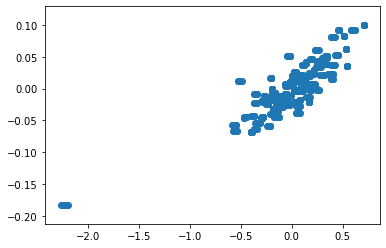

In [21]:
plt.scatter(abs_ranks.values.ravel(), rel_ranks.values.ravel())
pearsonr(abs_ranks.values.ravel(), rel_ranks.values.ravel())

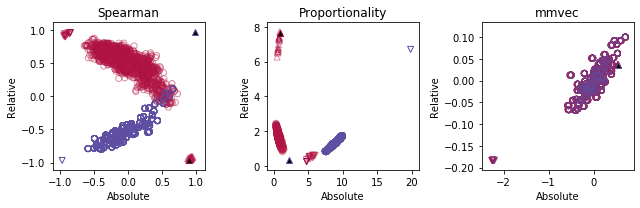

In [22]:
def plot_ranks(abs_ranks, rel_ranks, oc, axs):
    for i in range(1, abs_r.shape[0]):
        axs.scatter(abs_ranks.values[i, 2:], rel_ranks.values[i, 2:], 
                    facecolors='none', edgecolors=oc[i], alpha=0.5)
        axs.scatter(abs_ranks.values[0, 2:], rel_ranks.values[0, 2:], 
                    facecolors='none', edgecolors=oc[0], alpha=0.5)

    # negative metabolite
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks.values[i, 1], rel_ranks.values[i, 1], marker='v',
                    facecolors='none', edgecolors=oc[i], alpha=0.5)
    axs.scatter(abs_ranks.values[1, 1], rel_ranks.values[1, 1], marker='v', 
                facecolors='none', edgecolors=oc[1], label='- metabolite, - microbe')    
    axs.scatter(abs_ranks.values[0, 1], rel_ranks.values[0, 1], marker='v', 
                facecolors='none', edgecolors=oc[0], label='- metabolite, + microbe')
    
    # positive metabolite
    for i in range(1, abs_r.shape[0]):
        axs.scatter(abs_ranks.values[i, 0], rel_ranks.values[i, 0], marker='^', 
                    facecolors='none', edgecolors=oc[i], alpha=0.5)
    axs.scatter(abs_ranks.values[1, 0], rel_ranks.values[1, 0], marker='^', 
                facecolors='k', edgecolors=oc[1], label='+ metabolite, - microbe')    
    axs.scatter(abs_ranks.values[0, 0], rel_ranks.values[0, 0], marker='^', 
                facecolors='k', edgecolors=oc[0], label='+ metabolite, + microbe')
    

fig, ax = plt.subplots(1, 3, figsize=(9, 3))

plot_ranks(abs_r, rel_r, oc, ax[0])
ax[0].set_title('Spearman')
ax[0].set_ylabel('Relative')
ax[0].set_xlabel('Absolute')
plot_ranks(abs_phi, rel_phi, oc, ax[1])
ax[1].set_title('Proportionality')
ax[1].set_ylabel('Relative')
ax[1].set_xlabel('Absolute')
plot_ranks(abs_ranks, rel_ranks, oc, ax[2])
ax[2].set_title('mmvec')
ax[2].set_ylabel('Relative')
ax[2].set_xlabel('Absolute')

plt.tight_layout()

In [23]:
from biom import Table
mids = list(map(lambda x: 'm' + str(x), range(m_proportions.shape[1])))
oids = list(map(lambda x: 'm' + str(x), range(o_proportions.shape[1])))
sids = list(map(lambda x: 'm' + str(x), range(o_proportions.shape[0])))

o_prop_table = Table(o_proportions.values.T, oids, sids)
m_prop_table = Table(m_proportions.values.T, mids, sids)

o_abs_table = Table(o_abs.values.T, oids, sids)
m_abs_table = Table(m_abs.values.T, mids, sids)

In [24]:
from biom.util import biom_open

with biom_open('../results/benchmark_output/growth_sims/abs/microbe_abs.biom', 'w') as f:
    o_abs_table.to_hdf5(f, 'microbe_abs')
    
with biom_open('../results/benchmark_output/growth_sims/abs/metabolite_abs.biom', 'w') as f:
    m_abs_table.to_hdf5(f, 'metabolite_abs')
    
with biom_open('../results/benchmark_output/growth_sims/rel/microbe_rel.biom', 'w') as f:
    o_prop_table.to_hdf5(f, 'microbe_abs')
    
with biom_open('../results/benchmark_output/growth_sims/rel/metabolite_rel.biom', 'w') as f:
    m_prop_table.to_hdf5(f, 'metabolite_abs')